In [52]:
# Lecture 3 for the University of Tulsa's QM-7063 Data Mining Course
# Dimension Reduction
# Professor: Dr. Abdulrashid, Spring 2023
# Noah L. Schrick - 1492657

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [36]:
bostonHousing_df = pd.read_csv('BostonHousing.csv')
bostonHousing_df = bostonHousing_df.rename(columns={'CAT.MEDV': 'CAT_MEDV'})

# Compute mean, standard dev., min, max, median, length, and missing values for all variables
pd.DataFrame({'mean': bostonHousing_df.mean(),
'sd': bostonHousing_df.std(),
'min': bostonHousing_df.min(),
'max': bostonHousing_df.max(),
'median': bostonHousing_df.median(),
'length': len(bostonHousing_df),
'miss.val': bostonHousing_df.isnull().sum(),
})




mean          sd        min       max     median  length  \
CRIM        3.613524    8.601545    0.00632   88.9762    0.25651     506   
ZN         11.363636   23.322453    0.00000  100.0000    0.00000     506   
INDUS      11.136779    6.860353    0.46000   27.7400    9.69000     506   
CHAS        0.069170    0.253994    0.00000    1.0000    0.00000     506   
NOX         0.554695    0.115878    0.38500    0.8710    0.53800     506   
RM          6.284634    0.702617    3.56100    8.7800    6.20850     506   
AGE        68.574901   28.148861    2.90000  100.0000   77.50000     506   
DIS         3.795043    2.105710    1.12960   12.1265    3.20745     506   
RAD         9.549407    8.707259    1.00000   24.0000    5.00000     506   
TAX       408.237154  168.537116  187.00000  711.0000  330.00000     506   
PTRATIO    18.455534    2.164946   12.60000   22.0000   19.05000     506   
LSTAT      12.653063    7.141062    1.73000   37.9700   11.36000     506   
MEDV       22.532806    9.197104    5.00000   50.0000   21.20000     506   
CAT_MEDV    0.166008    0.372456    0.00000    1.0000    0.00000     506   

          miss.val  
CRIM             0  
ZN               0  
INDUS            0  
CHAS             0  
NOX              0  
RM               0  
AGE              0  
DIS              0  
RAD              0  
TAX              0  
PTRATIO          0  
LSTAT            0  
MEDV             0  
CAT_MEDV         0

In [37]:
# Correlation Matrix
bostonHousing_df.corr().round(2)

CRIM    ZN  INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX  \
CRIM      1.00 -0.20   0.41 -0.06  0.42 -0.22  0.35 -0.38  0.63  0.58   
ZN       -0.20  1.00  -0.53 -0.04 -0.52  0.31 -0.57  0.66 -0.31 -0.31   
INDUS     0.41 -0.53   1.00  0.06  0.76 -0.39  0.64 -0.71  0.60  0.72   
CHAS     -0.06 -0.04   0.06  1.00  0.09  0.09  0.09 -0.10 -0.01 -0.04   
NOX       0.42 -0.52   0.76  0.09  1.00 -0.30  0.73 -0.77  0.61  0.67   
RM       -0.22  0.31  -0.39  0.09 -0.30  1.00 -0.24  0.21 -0.21 -0.29   
AGE       0.35 -0.57   0.64  0.09  0.73 -0.24  1.00 -0.75  0.46  0.51   
DIS      -0.38  0.66  -0.71 -0.10 -0.77  0.21 -0.75  1.00 -0.49 -0.53   
RAD       0.63 -0.31   0.60 -0.01  0.61 -0.21  0.46 -0.49  1.00  0.91   
TAX       0.58 -0.31   0.72 -0.04  0.67 -0.29  0.51 -0.53  0.91  1.00   
PTRATIO   0.29 -0.39   0.38 -0.12  0.19 -0.36  0.26 -0.23  0.46  0.46   
LSTAT     0.46 -0.41   0.60 -0.05  0.59 -0.61  0.60 -0.50  0.49  0.54   
MEDV     -0.39  0.36  -0.48  0.18 -0.43  0.70 -0.38  0.25 -0.38 -0.47   
CAT_MEDV -0.15  0.37  -0.37  0.11 -0.23  0.64 -0.19  0.12 -0.20 -0.27   

          PTRATIO  LSTAT  MEDV  CAT_MEDV  
CRIM         0.29   0.46 -0.39     -0.15  
ZN          -0.39  -0.41  0.36      0.37  
INDUS        0.38   0.60 -0.48     -0.37  
CHAS        -0.12  -0.05  0.18      0.11  
NOX          0.19   0.59 -0.43     -0.23  
RM          -0.36  -0.61  0.70      0.64  
AGE          0.26   0.60 -0.38     -0.19  
DIS         -0.23  -0.50  0.25      0.12  
RAD          0.46   0.49 -0.38     -0.20  
TAX          0.46   0.54 -0.47     -0.27  
PTRATIO      1.00   0.37 -0.51     -0.44  
LSTAT        0.37   1.00 -0.74     -0.47  
MEDV        -0.51  -0.74  1.00      0.79  
CAT_MEDV    -0.44  -0.47  0.79      1.00

In [38]:
# Create bins of size 1 for variables

bostonHousing_df['RM_bin'] = pd.cut(bostonHousing_df.RM, range(0, 10), labels=False)

# Compute average of MEDV by (binned) RM and CHAS. 
# Group the data using groupby, then restrict the analysis to MEDV and determine the mean for each group.

bostonHousing_df.groupby(['RM_bin', 'CHAS'])['MEDV'].mean()


RM_bin  CHAS
3       0       25.300000
4       0       15.407143
5       0       17.200000
        1       22.218182
6       0       21.769170
        1       25.918750
7       0       35.964444
        1       44.066667
8       0       45.700000
        1       35.950000
Name: MEDV, dtype: float64

In [15]:
# create bins of size 1 for RM
bostonHousing_df['RM_bin'] = pd.cut(bostonHousing_df.RM, range(0, 10), labels=False)

# use pivot_table() to reshape data and generate pivot table
pd.pivot_table(bostonHousing_df, values='MEDV', index=['RM_bin'], columns=['CHAS'], aggfunc=np.mean, margins=True)

CHAS            0          1        All
RM_bin                                 
3       25.300000        NaN  25.300000
4       15.407143        NaN  15.407143
5       17.200000  22.218182  17.551592
6       21.769170  25.918750  22.015985
7       35.964444  44.066667  36.917647
8       45.700000  35.950000  44.200000
All     22.093843  28.440000  22.532806

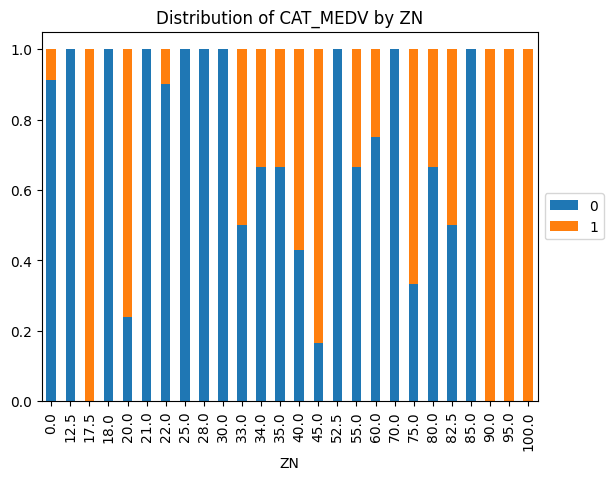

In [49]:
## Stacked Bar Charts
# use crosstab to create a cross-tabulation of two variables
tbl = pd.crosstab(bostonHousing_df.CAT_MEDV, bostonHousing_df.ZN)

# convert numbers to ratios
propTbl = tbl / tbl.sum()
propTbl.round(2)

# plot the ratios in a stacked bar chart
ax = propTbl.transpose().plot(kind='bar', stacked=True)
plt.title('Distribution of CAT_MEDV by ZN')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [53]:
## PCA
cereals_df = pd.read_csv('Cereals.csv')

pcs = PCA(n_components=2)
pcs.fit(cereals_df[['calories', 'rating']])

pcs = PCA()
pcs.fit(cereals_df.iloc[:, 3:].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': 
   np.sqrt(pcs.explained_variance_), 'Proportion of variance': 
   pcs.explained_variance_ratio_,'Cumulative proportion': 
   np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, 
   len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

PC1      PC2      PC3      PC4     PC5     PC6  \
Standard deviation      83.7641  70.9143  22.6437  19.1815  8.4232  2.0917   
Proportion of variance   0.5395   0.3867   0.0394   0.0283  0.0055  0.0003   
Cumulative proportion    0.5395   0.9262   0.9656   0.9939  0.9993  0.9997   

                           PC7     PC8     PC9    PC10    PC11   PC12  PC13  
Standard deviation      1.6994  0.7796  0.6578  0.3704  0.1864  0.063   0.0  
Proportion of variance  0.0002  0.0000  0.0000  0.0000  0.0000  0.000   0.0  
Cumulative proportion   0.9999  1.0000  1.0000  1.0000  1.0000  1.000   1.0

In [57]:
np.cov(cereals_df.calories, cereals_df.rating)

array([[ 379.63089542, -188.68156228],
       [-188.68156228,  197.32632105]])